### 1. Libraries

Data analysis and computing

In [1]:
import pandas as pd
import numpy as np

Preprocess

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

Text mining

In [3]:
import re
import nltk
import string
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Machine learning

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Measures

In [5]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, roc_curve, auc

Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Others

In [7]:
np.random.seed(0)

### 2. Data Set

#### Loading Data Set with Headlines to analyse

In [8]:
FILENAME = 'Sarcasm_Headlines_Dataset.json'
Headlines_Dataset = pd.read_json(FILENAME, lines=True)

#### General information about data set

In [9]:
Headlines_Dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Number of Headlines

In [10]:
Headlines_Dataset.shape

(26709, 3)

Columns

In [11]:
Headlines_Dataset.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [12]:
Headlines_Dataset.drop(columns='article_link', inplace=True)

In [13]:
Headlines_Dataset

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


#### Checking number of instances in each class

In [14]:
Headlines_Dataset.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [15]:
Headlines_Dataset.is_sarcastic.value_counts()/Headlines_Dataset.is_sarcastic.value_counts().sum()

0    0.561047
1    0.438953
Name: is_sarcastic, dtype: float64

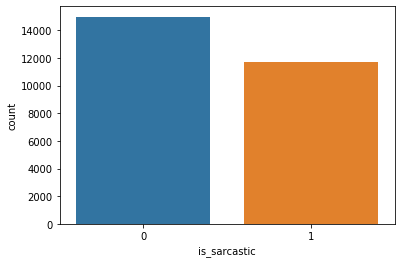

In [16]:
sns.countplot(Headlines_Dataset.is_sarcastic)
plt.show()

Data set is balanced

### 3. Data Cleaning

Changing all headlines to lower case form

In [17]:
Headlines_Dataset.headline = [single_headline.lower() for single_headline in Headlines_Dataset.headline]

Before we clean all headlines from digits and non-letter symbols we need to look inside our data. Maybe there are some information worth not to lose

In [18]:
for single_headline in Headlines_Dataset.headline:
    print(single_headline)

former versace store clerk sues over secret 'black code' for minority shoppers
the 'roseanne' revival catches up to our thorny political mood, for better and worse
mom starting to fear son's web series closest thing she will have to grandchild
boehner just wants wife to listen, not come up with alternative debt-reduction ideas
j.k. rowling wishes snape happy birthday in the most magical way
advancing the world's women
the fascinating case for eating lab-grown meat
this ceo will send your kids to school, if you work for his company
top snake handler leaves sinking huckabee campaign
friday's morning email: inside trump's presser for the ages
airline passengers tackle man who rushes cockpit in bomb threat
facebook reportedly working on healthcare features and apps
north korea praises trump and urges us voters to reject 'dull hillary'
actually, cnn's jeffrey lord has been 'indefensible' for a while
barcelona holds huge protest in support of refugees
nuclear bomb detonates during rehearsal 

dog held against will inside skype window
on world food day, take action against hunger
new girlfriend bears disturbing resemblance to old girlfriend
lindsey graham stays up all night running campaign ideas by toll-free telephone operator
president trump's judicial nominees drive samantha bee to drink
romney pledges to replace all foreign policy with jobs right here in america
obamas reunited live on tv for first time since leaving white house
gett: the trial of viviane amsalem or, the craziness of israeli society
frustrated man forced to agree with dumbass political cartoon of statue of liberty hugging immigrants
trump welcomes jefferson davis statue as special state of the union guest
netanyahu meets with donald trump, hillary clinton ahead of first debate
where you live may add to why you smoke
massive magma chamber discovered under yellowstone
'i am under 18' button clicked for first time in history of internet
parents with more vacation time, financial resources want to know when 

decades of hosts return for 'gma' anniversary
how the axact scandal changed pakistan's media
u.n. tribunal swayed by thousands of children's letters to milosevic
joe walsh executed to keep 'eagles greatest hits' sales ahead of 'thriller'
bold intern giving parents tour of office
moving to new city to solve all of area man's problems
arsenio hall tapped to host 'bet honors'
report: 10 million killed annually by stepping out of comfort zones
women aren't immune to sexism anywhere, even at the olympics
driving instructor has own gas pedal in case student total pussy
vine stars chris & shan get super awkward with huffpost 6x60
area man refuses to accept bus-route change
16 states back a lawsuit to block anti-planned parenthood measure
watch live: reproductive rights at forefront on wisconsin primary day
the 'pitch perfect 2' super bowl trailer is aca-here
god recalls 1983 speedboat accident that sent him to heaven
report: mothers not paying attention to 80% of cool things nation's boys do


we obtained hillary clinton's secret gitmo memo to obama. read it here.
police use exact right amount of force to subdue suspect
mount vernon says it owns george washington's copy of don quixote, not glenn beck
clinton questions obama's ability to greet world leaders
permission denied
want to make a difference? don't be a hedge fund manager
new edition of bible specifically mentions second amendment
is this the end of youtube?
u.s. census report finds some poor fuck named kip
triple bombings in baghdad kill 72 in worst violence so far this year
watch kristin davis' 'sex and the city' nightmare sketch come true
ecstatic american indians praise 'the lone ranger'
man constantly blaming his problems on fact that he's on fire
study: americans enjoy watching tv, eating
smear campaign against michigan candidate shows how hard it is for muslims to run for office
omg we bought a house!  episode 12: anniversary al fresco!
judge orders man accused of tweeting threats to never tweet
soap star's pa

bush still getting clinton's mail
nutritionists reveal humans with proper diet should not be defecating
the 20 funniest tweets from women this week
travel ban is a minor win for trump and a major loss for human rights
5 friendship lessons you learned on the playground
kim kardashian says goodbye to obama with family photo and now we're crying just like north
report: some people wake up when it's still dark outside
ben affleck nominated for best friend of matt damon
highlighting in used copy of plato's republic stops on page 17
nation's women fantasize about some future election that isn't absolutely pivotal to their well-being
adam levine proudly displays his 'baby bump' alongside wife in cute instagram photo
birthday cards from grandma becoming more religious
taylor swift unveils even darker persona with new single 'skullfucking maggot shit boyfriend'
barack obama names alan moore official white house biographer
report: more americans willing to accept female wonder woman
clinton appo

city maoist visits country maoist
mom wants one of those things your sister has for christmas
taylor swift calls out celebrity culture
running shoes used mainly for computer programming
senate bully forces legislators to repeatedly pass 'we are huge homos' bill
singing the methane blues
you think these foods are healthy, but they are not
u.s. asks africa not to cash aid checks until after tax day
here's what is coming to amazon in april 2018
the story behind leonardo dicaprio and lady gaga's viral golden globes moment
watch abby wambach say goodbye to soccer in emotional final game
wednesday's morning email: kim jong un visits china
this man used a beyonce concert as a chance to catch up on some reading
housefly fondly recalls losing virginity on rotting pile of ground beef
van morrison removed from rock and roll hall of fame following allegations he bet on album sales
universal remote latest step in area man's plan for total living room domination
it's not far and einstein
god loses p

what olympic swimmer ryan lochte eats for breakfast will shock you
bowling green state just going to claim christopher lloyd as alumnus until someone calls them out
hillary clinton drops into detroit as democrats get nervous about black turnout
hillary clinton attempts to distance herself from the 'truly well off'
gop congressman claims kansas has more uninsured since health care reform
what the heart of a tiger looks like: faith instead of fear
evan rachel wood is finally getting paid as much as her male 'westworld' costars
las vegas review-journal staffers want to know who owns their newspaper
hamilton brouhaha
a look inside the life of the woman behind marni
suarez's bite felt strongest in uruguay
lame cyberattack on atlanta doesn't even turn atms, street sweepers into killing machines
gorsuch and rbg - the new 'odd couple'?
united airlines ceo somehow won a major pr award last month
hippocratic oath updated to include vow of loyalty to blue cross blue shield
it isn't easy being a '

kim kardashian tackled by hollywood prankster at paris fashion week
how a night with arianna huffington changed my life (also, she smells really good)
fsu's dalvin cook found not guilty of battery, plans to return to team
surprise! rnc's 'women vote trump' event fails to attract many women
colbert is stunned speechless by trump's terrible 'birthday present' for melania
bankrupt dot-com proud to have briefly changed the way people buy cheese graters
haunted hayride makes extra-spooky turn onto interstate
a mooc by any other name
vatican: gay people are 'our sons and daughters'
kourtney kardashian opens up about scott disick's rehab stay
women in business q&a: nawal motawi, motawi teleworks
red cross installs blood drop-off bins for donors' convenience
amtrak train derails in vermont, seven taken to hospital
city of baltimore targeting young professionals with new 'you get used to it' campaign
kalamazoo shooting suspect switched cars amid rampage
report: more companies offering paid mate

if you know someone with cancer you should know about this
the starks just had a very important reunion on 'game of thrones'
fcc to fine americans who don't keep up with tv shows
woman alleges donald trump groped her at 1998 tennis tournament
why you should say yes to that birthday invitation
what people are buying on amazon this week, besides baby banana toothbrushes
poll: 99% of human beings would prefer big, slobbery hound dog pope
was ryan gosling first choice for people's sexiest man alive?!
50 cent faked wealth with borrowed jewelry and cars
company lacks manpower to complete newest round of layoffs
sanders says clinton's platform could determine how much he would campaign for her
woman who teaches special-needs children killing it at dinner party
if only all tampon ads were this honest
paul ryan smiles, thumbs up way through question about specificity of tax plan
seaworld responds to california drought by draining animal tanks halfway
this rare gene mutation makes some people cr

slightly larger chair shifts delicate balance of office power
troop gradually withdraws
parrot's previous owner obviously watched a lot of the price is right
royal baby has father's eyes
john oliver: 'f**king idiot' trump managed to screw up disavowing nazis
amandla stenberg is fearless and awesome in 'dazed' magazine
democratic senator caught on video with $70,000 in drug money
we in golden age of thing, guy who likes thing reports
school for the blind has huge empty grass field out front
senate republicans just killed their health care bill again
higher one must repay millions to students over 'deceptive' financial aid practices
icelandic prime minister abruptly ends interview after tax scandal question
14 workout pants that could pass as real pants
madeleine albright apologizes for implying female bernie supporters will go to hell
mit scientists perfect $30 million love tester
trump says iran is complying with nuclear deal, but remains a dangerous threat
life choices leading area ma

graduation party more lucrative than planned future career
the trump team keeps piling on criticism of mitt romney
the final indian war in america about to begin
review: new apple tv is bursting with potential
10 years of marriage equality
kate winslet is the slickest star on the 2016 oscars red carpet
taylor swift teases 'i don't wanna live forever' music video with zayn (update)
trump's goon squads
irs now requiring taxpayers to tip
hail mary! broncos fan sacked by security guard on christmas
madrid's 72-year-old feminist mayor shares her wisdom on life and politics
10 ways to deal with a difficult coworker
three-year-old gets carried away
masterpiece cakeshop case declared mistrial after clarence thomas tampers with evidence
happy mother's day to the moms leading the fight for trans students
the 20 funniest tweets from women this week
u.s. adds 4 million jobs but in st. louis
girl, 11, invents 'chemo backpack' to help kids with cancer, after battling the disease herself
scotland and

ford develops new suv that runs purely on gasoline
actor jason george from grey's anatomy talks about gun violence and social justice
schock is scrutinized around the country, but especially in his home district
song crafted in the deepest pit of hell wins big at grammys
swing latino takes colombian salsa to new heights on 'world of dance'
duterte says he may impose martial law if drug problem worsens
sony releases new earbud detangling spray
eminem rips nra in a rap: 'they love their guns more than our children'
what it really looks like to work out with your dog
airbnb user loves how easy website makes it to ejaculate in stranger's sink
gop presidential hopefuls fail again to sketch out an obamacare replacement
local news anchor mistakenly reveals salary during broadcast
'it's about a sense of meaning'
beloved archie comics get a dark makeover in new tv series 'riverdale'
nurses endure a shocking amount of violence on the job
hollywood's biggest stars endure long lines at oscars secu

why women should stop calling themselves old
the narco-terror trap
man in international airport only speaks business
once upon a festival 2015 is upon us
clinton goes back in time, teams up with golden-age clinton
joe biden's decision not to run followed rampant media speculation that he would
the best moments from the second democratic debate
cambridge cop accidentally arrests henry louis gates again during white house meeting
customer service operator safely in remote location
catholic church rules perjury not a mortal sin
12 ways to make your divorce as expensive as possible
new developing nations leader has big plans to crack down on global tax dodging
vatican policymaking once again manipulated by powerful second commandment rights groups
mortician who inspired 'bernie' movie sent back to prison for widow's murder
love the real you: the case for self love
a 'very gassy baby's' letter to a new mom, circa 1980
rebel wilson says 'male star' sexually harassed her while his friends tri

holocaust historian can't help imagining what random people would look like behind barbed-wire fence
world cup boosts iran's image and highlights political sports battles
how netflix's serial killer drama 'mindhunter' draws from real life
young frenchman identified as possible bomber in attack on bataclan concert hall
cyber monday 2015 may set a new record
new hampshire returns to obscurity
man catches bad television show going around office
trump campaign training poll watchers to spot any suspicious skin colors on election day
what i learned about my career from leading a double life
jimmy kimmel issues psa for angry trump fans planning to burn their maga hats
sunday night's supermoon was incredible — but deadly for these animals
suit up: 3 ways to tell if your suit fits
on-line gambling too depressing to even think about
americans demand military response after chinese shoot down directv satellite
look: surfer almost runs over shark with stand-up paddleboard and has no idea
ridley s

Let's keep some information about occurence of digits and few chosen marks

In [19]:
Headlines_Dataset['is_question_mark'] = Headlines_Dataset.headline.apply(lambda x: int(len(re.findall("\?", x)) > 0))
Headlines_Dataset['is_exclamation_mark'] = Headlines_Dataset.headline.apply(lambda x: int(len(re.findall("\!", x)) > 0))
Headlines_Dataset['is_percent_mark'] = Headlines_Dataset.headline.apply(lambda x: int(len(re.findall("\%", x)) > 0))
Headlines_Dataset['is_digit'] = Headlines_Dataset.headline.apply(lambda x: int(len(re.findall("\d+", x)) > 0))

Deleting all digits

In [20]:
print(string.digits)
digits_map = str.maketrans({key: None for key in string.digits})

0123456789


In [21]:
Headlines_Dataset.headline = [single_headline.translate(digits_map) for single_headline in Headlines_Dataset.headline]

Number of used punctuation

In [22]:
def punctuation_number(headline):
    return(len([word for word in headline.split() if word in list(string.punctuation)]))

Headlines_Dataset['number_of_punctuation'] = Headlines_Dataset.headline.apply(lambda x: punctuation_number(x))

Deleting all punctuations and special symbols

In [23]:
print(string.punctuation)
punct_map = str.maketrans({key: None for key in string.punctuation})

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
Headlines_Dataset.headline = [single_headline.translate(punct_map) for single_headline in Headlines_Dataset.headline]

Information about number of words, number of letters and length of words

In [25]:
Headlines_Dataset['number_of_words'] = Headlines_Dataset.headline.apply(lambda x: len(x.split()))

In [26]:
Headlines_Dataset['number_of_unique_words'] = Headlines_Dataset.headline.apply(lambda x: len(set(x.split())))

In [27]:
Headlines_Dataset['number_of_letters'] = Headlines_Dataset.headline.apply(lambda x: len(x))

In [28]:
def average_len_word(headline):
    return(np.mean([len(word) for word in headline.split()]))

Headlines_Dataset['avg_len_word'] = Headlines_Dataset.headline.apply(lambda x: average_len_word(x))

Tokenization

In [29]:
Headlines_Dataset.headline = [nltk.word_tokenize(single_headline) for single_headline in Headlines_Dataset.headline]

Number of used stopwords

In [30]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def number_of_stopwords(headline):
    return(len([word for word in headline if word in stopwords]))

Headlines_Dataset['number_of_stopwords'] = Headlines_Dataset.headline.apply(lambda x: number_of_stopwords(x))

Deleting stopwords

In [32]:
Headlines_Dataset.headline = [[word for word in single_headline if word not in stopwords] for single_headline in Headlines_Dataset.headline]

Stemming

In [33]:
stemmer = nltk.PorterStemmer()
Headlines_Dataset.headline = [[stemmer.stem(word) for word in headline] for headline in Headlines_Dataset.headline]

Join headlines word list into single headline

In [34]:
Headlines_Dataset.headline = [" ".join(headline) for headline in Headlines_Dataset.headline]

Looking at data set after cleaning

In [35]:
Headlines_Dataset

,headline,is_sarcastic,is_question_mark,is_exclamation_mark,is_percent_mark,is_digit,number_of_punctuation,number_of_words,number_of_unique_words,number_of_letters,avg_len_word,number_of_stopwords
0,former versac store clerk sue secret black cod...,0,0,0,0,0,0,12,12,76,5.416667,2
1,roseann reviv catch thorni polit mood better wors,0,0,0,0,0,0,14,14,81,4.857143,6
2,mom start fear son web seri closest thing gran...,1,0,0,0,0,0,14,13,78,4.642857,5
3,boehner want wife listen come altern debtreduc...,1,0,0,0,0,0,13,13,82,5.384615,5
4,jk rowl wish snape happi birthday magic way,0,0,0,0,0,0,11,11,62,4.727273,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26704,american polit moral freefal,0,0,0,0,0,0,5,5,35,6.200000,1
26705,america best hike,0,0,0,0,1,0,3,3,20,5.666667,0
26706,repar obama,0,0,0,0,0,0,3,3,21,6.333333,1
26707,isra ban target boycott support rais alarm abroad,0,0,0,0,0,0,8,8,60,6.625000,0


### 4. Text representation

After cleaning data set we can look into number of each word occurence in all headlines. We can compare our two class - sarcastic and non-sarcastic headlines according to this element

#### CountVectorizer

In [36]:
min_number_of_occurence = 3

cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b', min_df = min_number_of_occurence)
Headlines_CountVec = cv.fit_transform(Headlines_Dataset.headline)

CountVectorizer returns sparse matrix

In [37]:
Headlines_CountVec.todense().A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
Headlines_CountVec.shape

(26709, 7694)

In [39]:
cv.vocabulary_

{'former': 2648,
 'store': 6553,
 'clerk': 1259,
 'sue': 6636,
 'secret': 6011,
 'black': 684,
 'code': 1307,
 'minor': 4388,
 'shopper': 6147,
 'roseann': 5823,
 'reviv': 5718,
 'catch': 1058,
 'thorni': 6890,
 'polit': 5201,
 'mood': 4459,
 'better': 629,
 'wors': 7604,
 'mom': 4437,
 'start': 6498,
 'fear': 2475,
 'son': 6367,
 'web': 7459,
 'seri': 6060,
 'closest': 1280,
 'thing': 6882,
 'boehner': 741,
 'want': 7412,
 'wife': 7529,
 'listen': 4010,
 'come': 1342,
 'altern': 191,
 'idea': 3365,
 'jk': 3662,
 'rowl': 5840,
 'wish': 7563,
 'happi': 3063,
 'birthday': 672,
 'magic': 4126,
 'way': 7443,
 'advanc': 75,
 'world': 7600,
 'women': 7582,
 'fascin': 2454,
 'case': 1042,
 'eat': 2133,
 'meat': 4267,
 'ceo': 1091,
 'send': 6044,
 'kid': 3769,
 'school': 5963,
 'work': 7593,
 'compani': 1364,
 'top': 6976,
 'snake': 6310,
 'handler': 3052,
 'leav': 3913,
 'sink': 6221,
 'huckabe': 3310,
 'campaign': 973,
 'friday': 2700,
 'morn': 4466,
 'email': 2197,
 'insid': 3493,
 'trump':

In [40]:
cv.get_feature_names()

['aaron',
 'aarp',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abc',
 'abduct',
 'abdul',
 'abil',
 'abl',
 'aboard',
 'abort',
 'abram',
 'abramson',
 'abroad',
 'abruptli',
 'absenc',
 'absolut',
 'abu',
 'abus',
 'academi',
 'acceler',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accus',
 'ach',
 'achiev',
 'acid',
 'acknowledg',
 'aclu',
 'acquaint',
 'acquir',
 'acquit',
 'acr',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'adderal',
 'addict',
 'addit',
 'address',
 'adel',
 'adelson',
 'adequ',
 'adjac',
 'adjust',
 'administr',
 'admir',
 'admiss',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adult',
 'adulthood',
 'advanc',
 'advantag',
 'adventur',
 'advers',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisori',
 'advoc',
 'advocaci',
 'aerob',
 'aerosmith',
 'affair',
 'affect',
 'affili',
 'affleck',


In [41]:
Headlines_dense = pd.DataFrame(Headlines_CountVec.toarray(), columns=cv.get_feature_names())
Headlines_dense

,aaron,aarp,ab,abandon,abbey,abbi,abc,abduct,abdul,abil,...,zealand,zen,zero,zika,zimmerman,zip,zone,zoo,zookeep,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


List of top 20 most frequent words:

In [42]:
most_freq_words = 20

Headlines_dense.sum().sort_values(ascending=False)[:most_freq_words]

trump       1650
new         1516
man         1386
get          770
say          697
report       668
make         621
us           568
day          535
one          535
year         523
nation       504
time         495
american     494
area         492
woman        479
donald       473
like         472
obama        426
take         415
dtype: int64

Merging data set created with CountVectorizer and data set with information about number o words and letters in headline

In [43]:
Headlines = pd.merge(Headlines_Dataset, Headlines_dense, left_index=True, right_index=True)

In [44]:
Headlines.shape

(26709, 7706)

In [45]:
Headlines.drop(columns='headline', inplace=True)

In [46]:
Headlines.columns

Index(['is_sarcastic', 'is_question_mark', 'is_exclamation_mark',
       'is_percent_mark', 'is_digit', 'number_of_punctuation',
       'number_of_words', 'number_of_unique_words', 'number_of_letters',
       'avg_len_word',
       ...
       'zealand', 'zen', 'zero', 'zika', 'zimmerman', 'zip', 'zone', 'zoo',
       'zookeep', 'zuckerberg'],
      dtype='object', length=7705)

In [47]:
Headlines

,is_sarcastic,is_question_mark,is_exclamation_mark,is_percent_mark,is_digit,number_of_punctuation,number_of_words,number_of_unique_words,number_of_letters,avg_len_word,...,zealand,zen,zero,zika,zimmerman,zip,zone,zoo,zookeep,zuckerberg
0,0,0,0,0,0,0,12,12,76,5.416667,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,14,14,81,4.857143,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,14,13,78,4.642857,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,13,13,82,5.384615,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,11,11,62,4.727273,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0,0,0,0,0,0,5,5,35,6.200000,...,0,0,0,0,0,0,0,0,0,0
26705,0,0,0,0,1,0,3,3,20,5.666667,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,0,0,0,3,3,21,6.333333,...,0,0,0,0,0,0,0,0,0,0
26707,0,0,0,0,0,0,8,8,60,6.625000,...,0,0,0,0,0,0,0,0,0,0


Most frequent words in sarcastic headlines:

In [48]:
most_freq_words = 20

Headlines_dense[Headlines['is_sarcastic'] == 1].sum().sort_values(ascending=False)[:most_freq_words]

man         1148
new          839
report       504
area         479
nation       403
get          393
woman        319
american     273
one          271
day          271
time         268
find         247
make         241
trump        235
year         235
go           233
like         230
studi        216
us           213
still        209
dtype: int64

Most frequent words in non-sarcastic headlines:

In [49]:
most_freq_words = 20

Headlines_dense[Headlines['is_sarcastic'] == 0].sum().sort_values(ascending=False)[:most_freq_words]

trump     1415
new        677
say        519
donald     457
make       380
get        377
us         355
women      313
year       288
day        264
one        264
way        255
show       252
peopl      243
like       242
obama      239
world      239
man        238
want       233
thing      230
dtype: int64

#### Preparing data for supervised learning algorithms

In [50]:
X_train, X_test, y_train, y_test = train_test_split(Headlines.drop(columns='is_sarcastic'), Headlines[['is_sarcastic']], test_size=0.3, random_state=42)

Checking of class ratio in train/test sets:

In [51]:
y_train.is_sarcastic.value_counts()/y_train.is_sarcastic.value_counts().sum()

0    0.56381
1    0.43619
Name: is_sarcastic, dtype: float64

In [52]:
y_test.is_sarcastic.value_counts()/y_test.is_sarcastic.value_counts().sum()

0    0.554599
1    0.445401
Name: is_sarcastic, dtype: float64

#### TFIDF

In [84]:
min_number_of_occurence = 3

tfidf = TfidfVectorizer(min_df=min_number_of_occurence)
Headlines = tfidf.fit_transform(Headlines_Dataset.headline)

#### SVD

As we can see our data set have over 7 thousands features - it can be troublesome for machine learning algorithms. 
In this situation we can use some dimensonality reduction methods to decrease number of features, but we have to keep in mind not to lose too much information

In [53]:
number_of_components = 10
svd = TruncatedSVD(n_components = number_of_components)
X_train_svd = svd.fit_transform(X_train)
X_train_svd.shape

(18696, 10)

In [54]:
svd.explained_variance_ratio_.cumsum()

array([0.9594975 , 0.974791  , 0.98036536, 0.98247202, 0.98282232,
       0.9830372 , 0.98321153, 0.98335798, 0.98348432, 0.98356821])

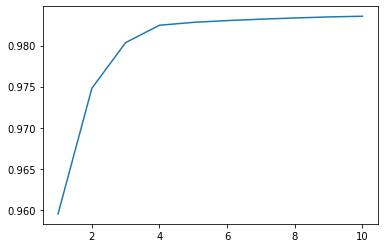

In [55]:
plt.plot(np.arange(1, number_of_components+1), svd.explained_variance_ratio_.cumsum())
plt.show()

Suprisingly, even only 2 components of singular value decomposition explains over 97% of dataset variance. Increasing number of components above 4 seems to be useless according to extremaly slowly growth of cumulated explained variance from this point on plot

array([[ 5.60454800e+01, -1.49832389e+00, -8.80140894e-01, ...,
         2.81114607e-02, -9.52916084e-02, -2.34840819e-02],
       [ 7.22455788e+01, -9.56861481e-01,  3.52307580e-01, ...,
        -4.75478846e-03, -1.38613055e-01, -1.36066735e-02],
       [ 3.43227989e+01,  5.44098081e-01, -1.82324526e+00, ...,
        -3.26164535e-02, -1.30492195e-01, -1.82911955e-01],
       ...,
       [ 6.29426840e+01, -7.59542845e-01, -5.62009605e-01, ...,
         1.07374158e-02, -4.40732939e-02, -2.48131653e-01],
       [ 5.67669410e+01, -2.93298581e-02, -8.40104830e-01, ...,
         1.51843970e-02, -9.15630944e-02, -7.12177187e-02],
       [ 3.41551805e+01,  1.57686830e+00, -2.63670119e+00, ...,
         1.60084806e-02, -2.60342378e-03,  3.44840656e-03]])

### 5. Machine Learning

In [ ]:
Now we are ready to check if 

In [57]:
number_of_components = 4
svd = TruncatedSVD(n_components = number_of_components)
X_train_svd = svd.fit_transform(X_train)
X_train_svd.shape

(18696, 4)

In [88]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM_lin', SVC(kernel='linear')))
models.append(('SVM_rbf', SVC(kernel='rbf')))
models.append(('NB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('NN_log', MLPClassifier(solver='lbfgs', activation = 'logistic'))) 
models.append(('NN_relu', MLPClassifier(solver='lbfgs', activation = 'relu')))

In [ ]:
pipelines = [Pipeline([("scaler", StandardScaler()),
                       ("model", LogisticRegression())]),
            Pipeline([("model", LogisticRegression())]),
            Pipeline([("model", DecisionTreeClassifier())]),
            Pipeline([("model", MultinomialNB())]),
            Pipeline([("model", KNeighborsClassifier())])
            ]

param_grids = [{"model__penalty": ["l1","l2"],
                "model__C": [1000, 100, 10, 1, 0.1, 0.01]},
               {"model__penalty": ["l1","l2"],
                "model__C": [1000, 100, 10, 1, 0.1, 0.01]},
               {'model__min_samples_leaf': [1, 5, 10, 25, 50, 100],
                'model__max_depth': [None, 30, 20, 10]},
               {},
               {'model__n_neighbors': [2, 3, 5, 10]}
              ]

In [ ]:
for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv=5)
    gs.fit(X_train, y_train)
    print(accuracy_score(y_test, gs.predict(X_test)))

In [ ]:
seed = 0; scoring = 'accuracy'
results = []
names = []

print('Name  mean_acc  std_acc')
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_svd, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{:<8} {:<4.3}  ({:<4.3})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

Name  mean_acc  std_acc


/home/krzysztof-d/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/krzysztof-d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krzysztof-d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krzysztof-d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1

LR       0.649  (0.00376)


/home/krzysztof-d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### Classifiers comparison
### Models preparing



### Evaluating each model in a sequence - kfold
seed = 0; scoring = 'accuracy'
results = []; names = []
print('Name  mean_acc  std_acc')
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{:<8} {:<4.3}  ({:<4.3})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)


### Boxplot algorithm comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison - kfold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### II evaluation - leave one out (very slow!)
results2 = []; names2 = []
scoring = 'accuracy'
loo = LeaveOneOut(len(y))
print('Name  mean_acc  std_acc')
for name, model in models:
    for train_idx, test_idx in loo:
        cv_results = model_selection.cross_val_score(model, X[train_idx], y[train_idx],  scoring=scoring)
        results2.append(cv_results)
        names2.append(name)
    msg = '{:<8} {:<4.3}  ({:<4.3})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

### Boxplot algorithm comparison
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison - leave1out')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show()

### Forecast using the choosen models
print('Expected [1 0 0]')
for name, model in models:
    msg = '{:<8} {}'.format(name, model.fit(X, y).predict(X_test))
    print(msg)


### GridSearchCV - parameters tuning for choosen classifiers
models2 = []
models2.append(('LR', LogisticRegression(), {'C': [0.1,1,10]}))
models2.append(('CART', DecisionTreeClassifier(), {'max_depth': [3,6,10, None]}))
models2.append(('RFC', RandomForestClassifier(), {'n_estimators':[30,50,70]}))
models2.append(('KNN', KNeighborsClassifier(), {'n_neighbors': [2,3,5]}))
models2.append(('SVC', SVC(probability=True), {'kernel': ['linear','rbf']}))

### Finding the best parameters
bests = []
for name, model, param_grid in models2:
   print('Model: ', name)
   scoring='accuracy'
   grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scoring, n_jobs=2)
   grid_search.fit(X, y)
   res = grid_search.cv_results_
   ### The best params writing down
   bests.append((name, deepcopy(model), grid_search.best_estimator_.get_params()))
   for i in range(len(res['rank_test_score'])):
       print('Rank: %.0f; params: %.20s; mean %s: %.2f; std %s: %.2f'
           %(res['rank_test_score'][i], str(res['params'][i]).strip('{}'),
           scoring, res['mean_test_score'][i],
           scoring, res['std_test_score'][i]))

### The best parameters passing back to the models and prediction
for name, model, param in bests:
    model.set_params(**param)
    model.fit(X, y)
    print(name, 'investment temper prediction, expected [1,0,0], predicted:', model.predict(X_test))


### ROC curves, Area-Under-Curve (AUC) - classifier with cross-validation and plot ROC curves
for name, model, gs in models2:
    cv = StratifiedKFold(n_splits=5)
    mean_tpr = 0.0; mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10,5)); lw=2
    colors = cycle(['red', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

    i = 0
    for (train, test), color in zip(cv.split(X, y), colors):
        probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Random')

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - %s '%name)
    plt.legend(loc="lower right")
    plt.show()


### Final tuning parameters by pipeline
pipeline = Pipeline([
       ('vect', None),
       ('reduce_dim', None ),# TruncatedSVD()),
       ('clf', None)
])

parameters = {
    'vect':([CountVectorizer()]),
    #'vect__max_df': (0.5, 1),
    #'vect__max_features': (100, None), #1000, 10000, 100000, None),
    #'vect__ngram_range': ((1, 1), (1, 2)), #(1,3)),
    'reduce_dim': ([TruncatedSVD()]), #None, TruncatedSVD(10)
    'reduce_dim__n_components': ([6,7,20]),
    'clf': ([LogisticRegression(), SVC(kernel='rbf')]), #  'linear', 'rbf' RandomForestClassifier()  DecisionTreeClassifier()
    #'clf__C': (0.01, 1, 10),
}

### Final learning
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1,
                           scoring='accuracy')
grid_search.fit(Xw[:len(wig)], wig['Gain'])

### The best parameters passed back to the pipeline
print ('The best model results: %0.3f' % grid_search.best_score_)
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print (param_name, best_parameters[param_name])

pipeline.set_params(**best_parameters)
print('Investment temper prediction, expected [1,0,0], predicted:', pipeline.predict(Xw[len(wig):]))

################################################################